# Import libraries and data


In [9]:
%cd /content/drive/MyDrive/Forecasting Models and Time Series for Business in Python

[WinError 3] The system cannot find the path specified: '/content/drive/MyDrive/Forecasting Models and Time Series for Business in Python'
C:\Users\HP 1O3O G2\TIME SERIES FORCASTING COURSE\Forecasting Models and Time Series for Business in Python\1. Introduction to Forecasting


In [10]:
#import libraries
import pandas as pd
import numpy as np

In [11]:
#get the data
data = pd.read_csv("../Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [12]:
#select variables
dataset = data.loc[:, ["cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head(1)                       

,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


#Data Transformation

In [13]:
#renaming variable
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset.head(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


In [14]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

#Visualization

<AxesSubplot: xlabel='dteday'>

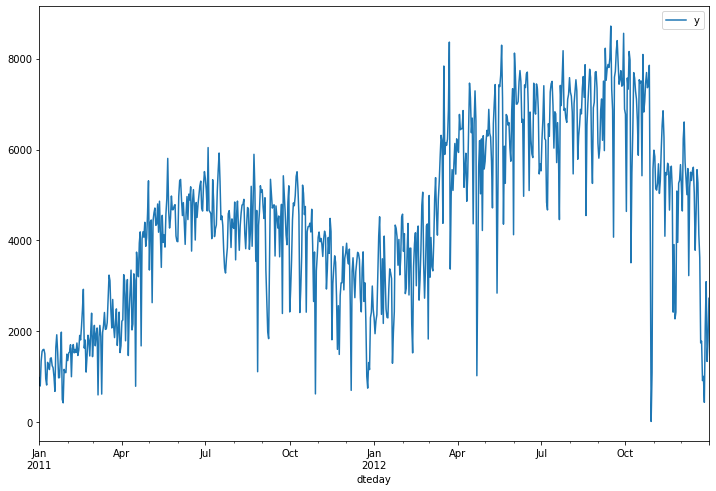

In [16]:
#viz
dataset["y"].plot(figsize = (12, 8), legend = True)

## MODEL DECOMPOSITION

In [17]:
#library
from statsmodels.tsa.seasonal import seasonal_decompose

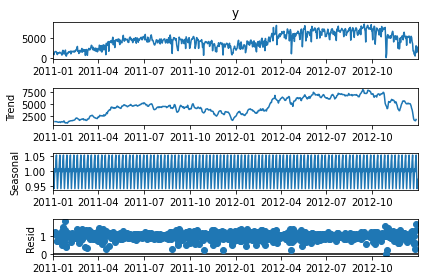

In [18]:
decomposition = seasonal_decompose(x=dataset.y,
    model='multiplicative',
    filt=None,
    period=None,
    two_sided=True,
    extrapolate_trend=0,
)
decomposition.plot();

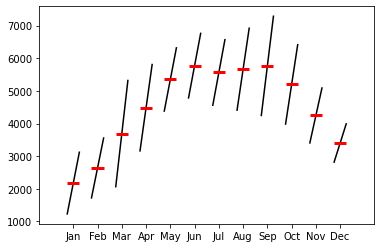

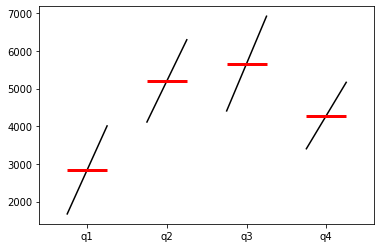

In [19]:
#seasonality graphs
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
month_plot(dataset.y.resample(rule = 'MS').mean())
quarter_plot(dataset.y.resample(rule = 'Q').mean());

## WINTER-HOLT

In [20]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.tail(1)

,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,
2012-12-31,2729,0,1,2,0.215833,0.223487,0.5775,0.154846


In [21]:
#libraries
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [22]:
#forecasting model
model = ExponentialSmoothing(endog = training_set.y,
                             trend = 'mul',
                             seasonal = 'mul',
                             seasonal_periods = 7).fit()

C:\Users\HP 1O3O G2\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [23]:
#predictions
predictions_hw = model.forecast(steps = len(test_set)).rename("HW")
predictions_hw.head()

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
Freq: D, Name: HW, dtype: float64

<AxesSubplot: xlabel='dteday'>

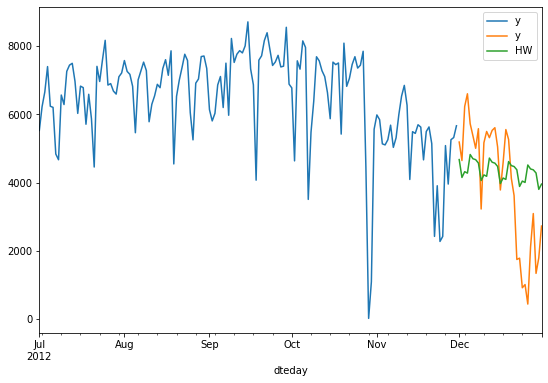

In [24]:
#visualization
training_set['y']['2012-07-01':].plot(figsize = (9,6), legend = True)
test_set['y'].plot(legend = True)
predictions_hw.plot(legend = True)

## MODEL ASSESSMENT

In [25]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(test_set['y'], predictions_hw),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_hw)), 0))

1389.0
1698.0


In [26]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_hw)

87.26099293841784

In [27]:
predictions_hw.to_csv('predictions_hw.csv', index = True)